<a href="https://colab.research.google.com/github/Rahulverma2045/NETFLIX-_MOVIES_AND_TV_SHOWS_CLUSTRING/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING



# **Project Type**    - Unsupervised
# **Contribution**    - Team
# **Team Member 1 -**RAHUL VERMA
# **Team Member 2 -**SUMIT SHARMA
# **Team Member 3 -**KHUSHBOO KHANRAH
# **Team Member 4 -**VISHAL TOMAR

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


# This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

#In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

#Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# *In this project, you are required to do



#Exploratory Data Analysis

#Understanding what type content is available in different countries

#Is Netflix has increasingly focusing on TV rather than movies in recent years.

# Clustering similar content by matching text-based features

# **Attribute Information**


#show_id : Unique ID for every Movie / Tv Show

#type : Identifier - A Movie or TV Show

#title : Title of the Movie / Tv Show

#director : Director of the Movie

#cast : Actors involved in the movie / show

#country : Country where the movie / show was produced

#date_added : Date it was added on Netflix

#release_year : Actual Releaseyear of the movie / show

#rating : TV Rating of the movie / show

#duration : Total Duration - in minutes or number of seasons

#listed_in : Genere

#description: The Summary description

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [313]:
# Import Libraries
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import AffinityPropagation

from sklearn.decomposition import PCA


from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
import nltk 

### Dataset Loading

In [314]:
# mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [315]:
# Dataset First Look
initial_df =  pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [316]:
df = initial_df.copy()

### Dataset Rows & Columns count

In [317]:
# head of the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [318]:
#tail of the dataset
df.tail()
     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Information

In [319]:
# Dataset  basic Info about data
df.info

<bound method DataFrame.info of      show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel 

In [320]:
# describing the dataset
df.describe(include = ['category', 'object']).transpose()

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


#### Duplicate Values

In [321]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [322]:
# Droping the show_id column
df = df.drop(['show_id'], axis =1)

#### Missing Values/Null Values

In [323]:
# Missing Values/Null Values Count
# checking missing values
df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

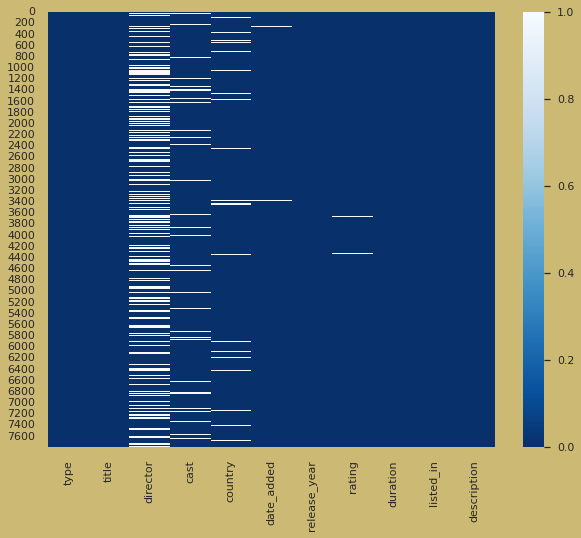

In [324]:
# Visualizing the missing values
plt.figure(figsize = (10,8), facecolor = 'y')
ax = plt.gca()
sns.heatmap(df.isnull(), cmap = 'Blues_r', ax =ax,  linecolor = 'r')
plt.show()

In [325]:
# filling the missing values in director, cast and country column
df['director'] =df.director.fillna('None')
df['cast'] =  df['cast'].fillna('not available')
df['country'] = df['country'].fillna('missing')
     

In [326]:

# checking for the missing values after imputing values in above columns
df.isnull().sum()
     

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [327]:
df['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7787, dtype: object

In [328]:
# dropping date_added and rating rows where values are missing
df = df.dropna(axis =0, subset = ['date_added', 'rating'] )
df['date_added'].isnull().sum()

0

In [329]:
df.dropna(axis = 0, inplace = True)
df.shape

(7770, 11)

In [330]:

# checking the null values after removal
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What did you know about your dataset?

Answer Here

In [331]:
# dropping date_added and rating rows where values are missing
df = df.dropna(axis =0, subset = ['date_added', 'rating'] )
df['date_added'].isnull().sum()

0

## ***2. Understanding Your Variables***

In [332]:
# Dataset Describe
df.describe(include = ['category', 'object']).transpose()

,count,unique,top,freq
type,7770,2,Movie,5372
title,7770,7770,3%,1
director,7770,4048,None,2376
cast,7770,6818,not available,718
country,7770,682,United States,2546
date_added,7770,1563,"January 1, 2020",118
rating,7770,14,TV-MA,2861
duration,7770,216,1 Season,1606
listed_in,7770,491,Documentaries,334
description,7770,7752,Multiple women report their husbands as missin...,3


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [333]:
# Check Unique Values for each variable.
df.nunique()

type               2
title           7770
director        4048
cast            6818
country          682
date_added      1563
release_year      73
rating            14
duration         216
listed_in        491
description     7752
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [334]:
# Write your code to make your dataset analysis ready.

#Separating the categorical and continous variable and storing them
categorical_variable=[]
continous_variable=[]

for i in df.columns:
  if i == 'id':
    pass
  elif df[i].nunique() <5:
    categorical_variable.append(i)
  elif df[i].nunique() >= 5:
    continous_variable.append(i)

print(categorical_variable)
print(continous_variable)

['type']
['title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [335]:
# defining a function to get the year addedfrom the date_added
def func_1(x):
  return x.split()[0]

In [336]:
# Define a function to extract the month from a date string
def func_1(date_str):
    try:
        return datetime.strptime(date_str, '%B %d, %Y').month
    except:
        return None

# Apply the function to the 'date_added' column to get the month added column
df['month_added'] = df['date_added'].apply(func_1)

# Extract the year from the 'date_added' column to get the year added column
df['year_added'] = df['date_added'].apply(lambda x: x.split()[-1] if isinstance(x, str) else None)

# Convert the release year column to a string
df['release_year'] = df['release_year'].astype(str)

# Drop the original 'date_added' column
df = df.drop('date_added', axis=1)


In [337]:
# checking the head of the dataset
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,TV Show,3%,None,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,None,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,None,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",None,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",None,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,None,2020


In [338]:
# defining two sub-datasets based on type of the content
shows_df = df[df['type'] == 'TV Show']
movie_df  = df[df['type']== 'Movie']


In [339]:
# creating a column n movie_df dataframe using func_1 funtion
movie_df['duration'] = movie_df['duration'].apply(func_1)

In [340]:
# head of movie_data
movie_df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,None,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,None,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,None,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",None,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,None,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",None,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,None,Dramas,A brilliant group of students become card-coun...,None,2020
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,None,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",None,2020


#### Chart - 1

# **Type distribution**

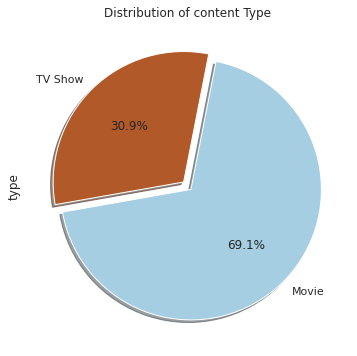

In [341]:
# Chart - 1 visualization code
# plotting the type distribution
sns.set_style('darkgrid')


plt.figure(figsize = (8,6))
df['type'].value_counts().plot.pie(autopct="%1.1f%%", cmap = 'Paired', shadow=True, startangle=190,explode=(0.04,0.04));
plt.title('Distribution of content Type')
plt.show()


In [342]:
# getting top 15 countries based on content type


# creating a  TV shows dataset where imputed values are not taking into account
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_df = tv_shows_df[tv_shows_df['country'] != 'missing']

# creating a  movies dataset where imputed values are not taking into account
movies_df  = df[df['type']== 'Movie']
movies_df = movies_df[movies_df['country'] != 'missing']


# getting unique values shows dataframe
country_df_shows = pd.DataFrame(tv_shows_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_shows.rename(columns = {'index': 'country', 0:'shows counts'}, inplace =True)
top_15_countries = country_df_shows.head(15)

# getting unique values shows dataframe fir movies
country_df_movies = pd.DataFrame(movies_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_movies.rename(columns = {'index': 'country', 0:'movies counts'}, inplace =True)
top_15_countries_movies = country_df_movies.head(15)
new_df = pd.concat([top_15_countries, top_15_countries_movies] , axis =1)

# final dataframe
new_df


,country,shows counts,country,movies counts
0,United States,860,United States,2427
1,United Kingdom,255,India,915
2,Japan,182,United Kingdom,466
3,South Korea,157,Canada,286
4,Canada,126,France,265
5,France,84,Spain,158
6,India,75,Germany,157
7,Taiwan,70,Japan,103
8,Australia,58,China,102
9,Spain,57,Mexico,101


In [343]:
# top 10 directors who have directed most move
director_df  =  df[df['director'] != 'None']
director_df = pd.DataFrame(director_df['director'].value_counts().head(10)).reset_index()
director_df.rename(columns = {'index' : 'director', 'director' : 'counts'}, inplace= True)
director_df



,director,counts
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
5,Youssef Chahine,12
6,Martin Scorsese,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Hakan Algül,8


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

# **Seasons**

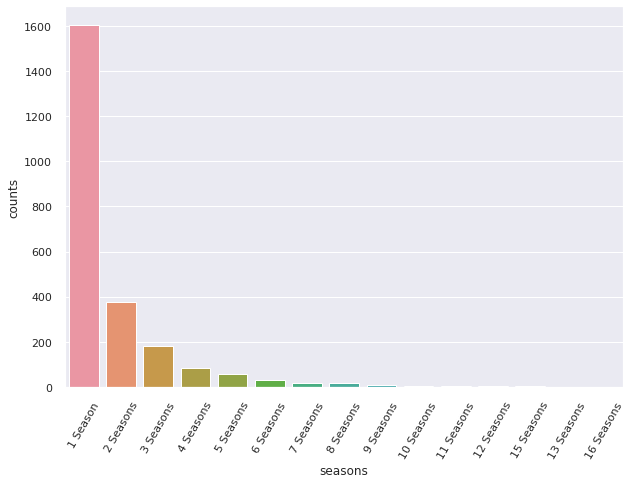

,seasons,counts
0,1 Season,1606
1,2 Seasons,378
2,3 Seasons,183
3,4 Seasons,86
4,5 Seasons,57
5,6 Seasons,30
6,7 Seasons,19
7,8 Seasons,18
8,9 Seasons,8
9,10 Seasons,5


In [344]:
# Chart - 2 visualization code
# plotting seasons distribution for TV shows

plt.figure(figsize = (10,7))


seasons_df = pd.DataFrame(shows_df['duration'].value_counts()).reset_index()
seasons_df.rename(columns = {'index': 'seasons', 'duration': 'counts'}, inplace = True)
sns.barplot(data =seasons_df, x= 'seasons', y= 'counts')
plt.xticks(rotation = 60)
plt.show()


seasons_df

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

# **Duration: ⌛**


In [345]:
# Chart - 3 visualization code
# Create subsets for tv shows and movies.
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

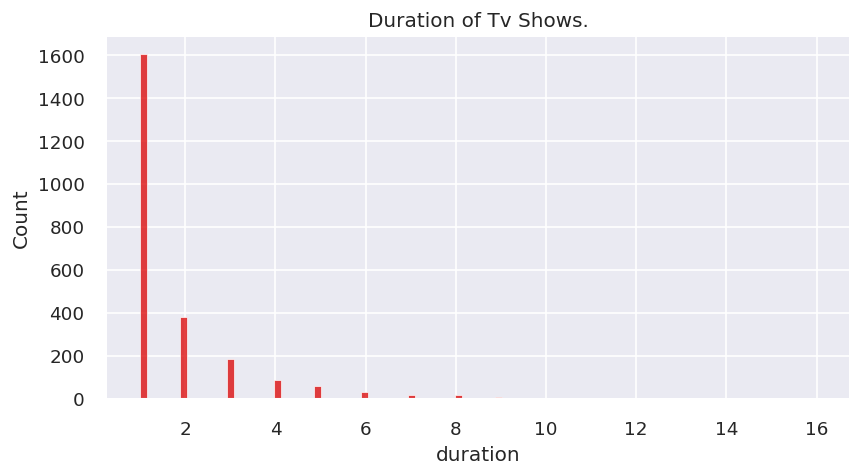

In [346]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()


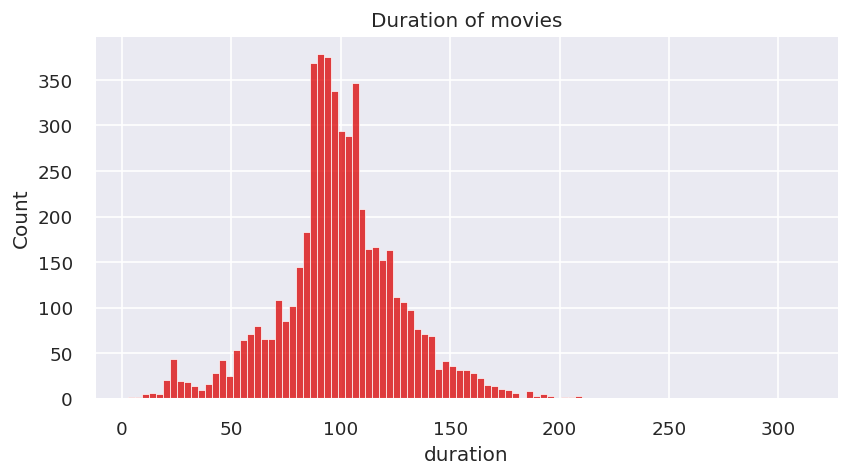

In [347]:

plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

# **Rating: ⭐⭐⭐**

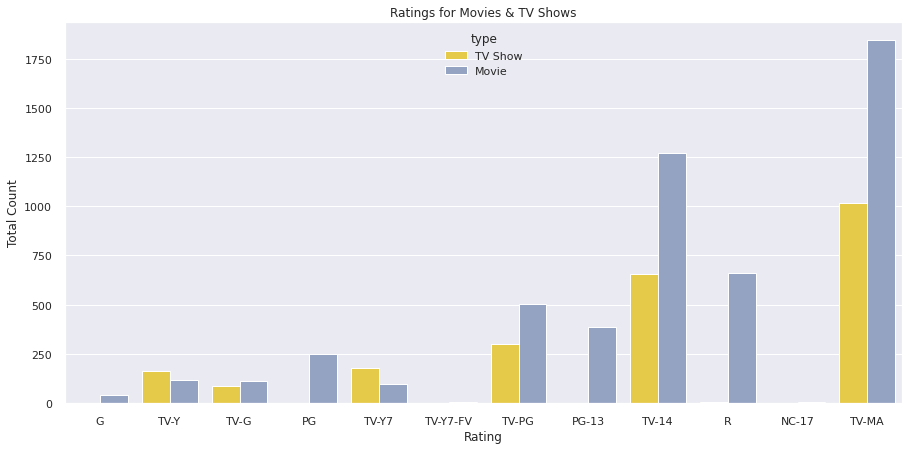

In [348]:
# Chart - 4 visualization code
# visualizing the distribution of various ratings
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(df.rating, hue=df.type, order=order, palette='Set2_r');
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

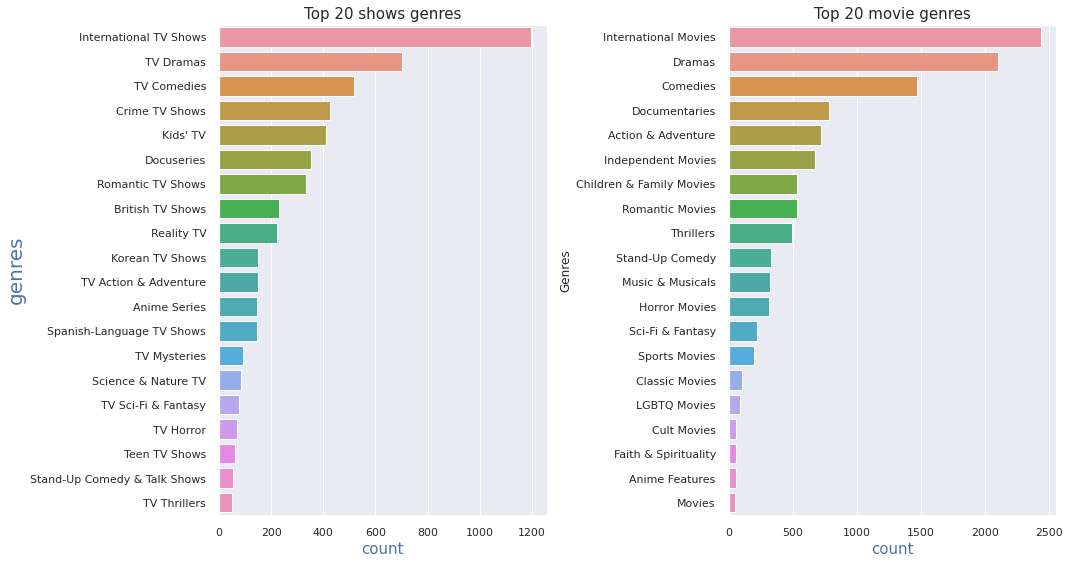

In [349]:
# finding top 20 movie genres in movies and TV shows
genres_shows = shows_df.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_movies = movie_df.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)


fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = genres_shows, order=genres_shows.value_counts().index[:20], ax= axes[0])
sns.countplot(y = genres_movies, order=genres_movies.value_counts().index[:20], ax= axes[1])

axes[0].set_xlabel('count', fontsize = 15, c='b')
axes[1].set_xlabel('count', fontsize = 15, c='b')
axes[0].set_ylabel('genres', fontsize = 20, c = 'b')
axes[0].set_title('Top 20 shows genres', fontsize = 15)
axes[1].set_title('Top 20 movie genres', fontsize = 15 )




# plt.figure(figsize=(7,9))
# g = sns.countplot(y = genres_shows, order=genres_shows.value_counts().index[:20])

# plt.xlabel('Titles')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

# **Actors**

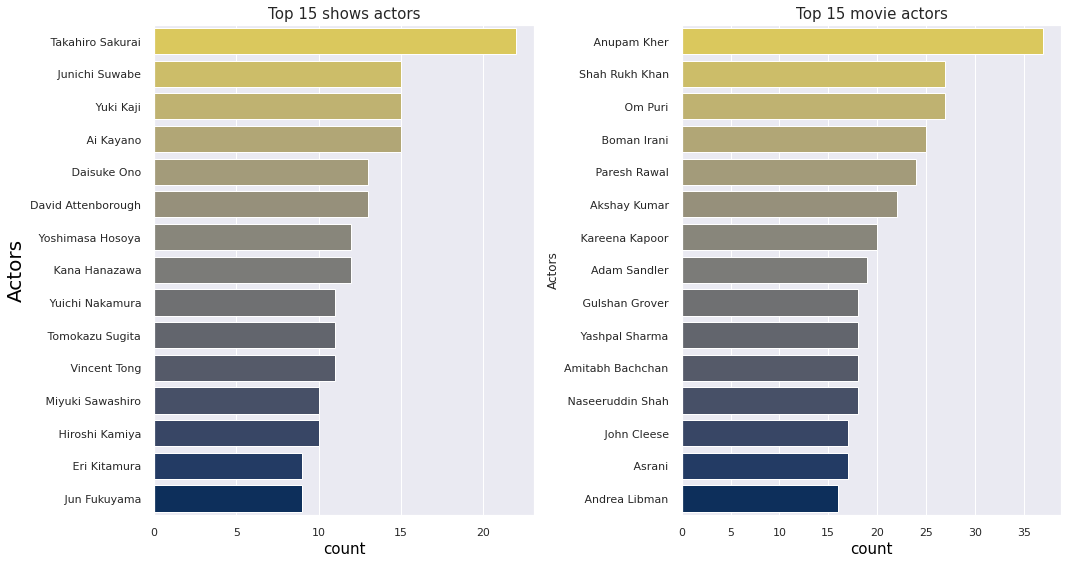

In [350]:
# Chart - 5 visualization code
# finding the top actors who worked in most content in movies and TV shows
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_actors = tv_shows_df[tv_shows_df['cast'] != 'not available']

movies_df  = df[df['type']== 'Movie']
movie_actors = movies_df[movies_df['cast'] != 'not available']




top_shows_actors =  tv_shows_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)
top_movie_actors =  movie_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)



fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = top_shows_actors, order=top_shows_actors.value_counts().index[:15], ax= axes[0], palette ='cividis_r')
sns.countplot(y = top_movie_actors, order=top_movie_actors.value_counts().index[:15], ax= axes[1], palette = 'cividis_r')

axes[0].set_xlabel('count', fontsize = 15, c='black')
axes[1].set_xlabel('count', fontsize = 15, c='black')
axes[0].set_ylabel('Actors', fontsize = 20, c = 'black')
axes[0].set_title('Top 15 shows actors', fontsize = 15)
axes[1].set_title('Top 15 movie actors', fontsize = 15 )

plt.ylabel('Actors')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

# **Most used word in title of content on Netflix**

In [351]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 144692 words in the combination of all titles.


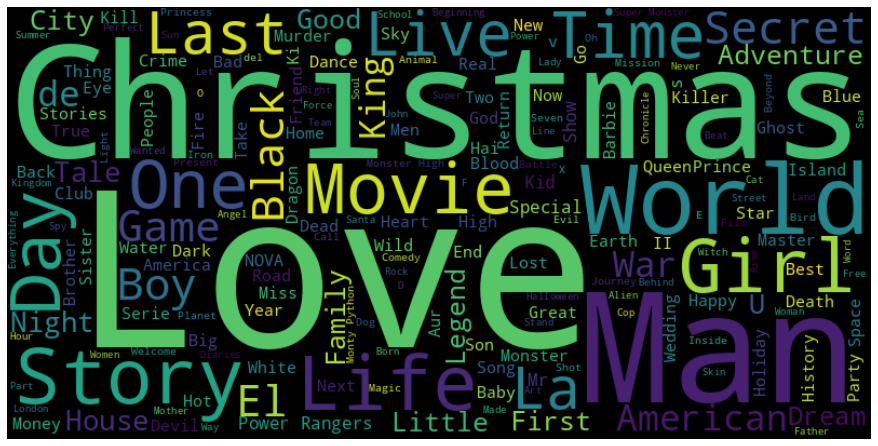

In [352]:
# Chart - 6 visualization code
#chcking word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (14,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

# **Cast: 🎭**

In [ ]:
# Chart - 7 visualization code

df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

# **Director: 🤠**

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

In [ ]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

# **Release_year : Actual Releaseyear of the movie / show**


In [ ]:
# Chart - 9 visualization code

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="release_year", data=df)
plt.title("Number of movie/show relesed on year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation =90)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

# **country : Country where the movie / show was produced**

In [ ]:
# Chart - 10 visualization code

#top 15 country where the movie/shows was produced
df["country"].value_counts()[:15].sort_values(ascending=False).plot(kind="bar")
plt.title("Top 15 Country where the movie / show was produced")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

# **listed_in : Genere**

In [ ]:
# Chart - 11 visualization code
# TOP 10 GENRES
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh', color= 'crimson')
plt.title('Top 10 genres', fontweight = 'bold')
#sns.countplot(palette = 'cubehelix')

In [ ]:
# SHARE TOP 3 GENRES
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

In [ ]:
# SHARE TOP 10 GENRES
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

The dramas is the most popular genre followed by comedies and documentaries.

These three genres account for about 12% of all movies and TV shows.

This value increases to about 29% for top 10 genres.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***